In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [1]:
import sys
print(sys.version)

3.10.13 | packaged by conda-forge | (main, Dec 23 2023, 15:36:39) [GCC 12.3.0]


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/working/'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
import cv2
import os

# Directory where your images are located
input_directory = '/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteopenia'
# Directory where you want to save the modified images
output_directory = '/kaggle/working/newinput'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop through the images in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".jpg"):  # Modify the file extension as needed
        # Load the image
        image_path = os.path.join(input_directory, filename)
        img = cv2.imread(image_path)

        # Zoom the image (resize)
        zoomed_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

        # Flip the image horizontally
        flipped_img = cv2.flip(zoomed_img, 1)

        # Save the modified image
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, flipped_img)

print("Images have been processed and saved to the output directory.")

Images have been processed and saved to the output directory.


In [4]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
#from keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

2025-03-05 05:40:41.728985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-05 05:40:41.729147: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-05 05:40:41.861455: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis/osteoporosis/normal'
aug_dir = '/kaggle/working/normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [6]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis/osteoporosis/osteoporosis'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [7]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-I/0Normal'
aug_dir = '/kaggle/working/normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [8]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-II/0Normal'
aug_dir = '/kaggle/working/normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [9]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-I/4Severe'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [10]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/digital-knee-xray/MedicalExpert-II/4Severe'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")


Augmentation complete.


In [11]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteoporosis'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")


Augmentation complete.


In [12]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/kaggle/input/osteoporosis-knee-dataset-preprocessed128x256/Osteoporosis Knee Dataset/Osteoporosis'
aug_dir = '/kaggle/working/osteoporosis'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)

# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]
    
    return augmented_images

# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))
        
        # Perform augmentation
        augmented_images = augment_image(img)
        
        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            
            # Check if the filename already exists, if so, append a number to make it unique
            counter = 1
            while os.path.exists(os.path.join(aug_dir, new_filename)):
                new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + '_' + str(counter) + os.path.splitext(filename)[1]
                counter += 1
            
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")


Augmentation complete.


In [13]:
import os
import pandas as pd

healthy_dirs = [
    r'/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/normal',
    r'/kaggle/input/osteoporosis/osteoporosis/normal',
    r'/kaggle/working/normal'
]
osteopenia_dir = [ r'/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteopenia',
                  r'/kaggle/working/newinput', r'/kaggle/working/newinput']

osteoporosis_dirs = [
    r'/kaggle/input/osteoporosis-database/Osteoporosis Knee X-ray/osteoporosis',
    r'/kaggle/input/osteoporosis-knee-xray-dataset/osteoporosis/osteoporosis',
    r'/kaggle/input/osteoporosis-knee-dataset-preprocessed128x256/Osteoporosis Knee Dataset/Osteoporosis',
    r'/kaggle/input/osteoporosis/osteoporosis/osteoporosis',
    r'/kaggle/working/osteoporosis'
]

filepaths = []
labels = []
dict_lists = [healthy_dirs,osteopenia_dir, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteopenia','Osteoporosis']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)
print(knee_osteoporosis_df.head())
print(knee_osteoporosis_df["labels"].value_counts())

                                           filepaths   labels
0  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
1  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
2  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
3  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
4  /kaggle/input/osteoporosis-database/Osteoporos...  Healthy
labels
Healthy         7353
Osteoporosis    5888
Osteopenia       374
Name: count, dtype: int64


In [14]:
knee_osteoporosis_df.shape

(13615, 2)

In [15]:
train_images, test_images = train_test_split(knee_osteoporosis_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(knee_osteoporosis_df, test_size=0.2, random_state=42)

In [16]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=16,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(224,224),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=16,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(224,224),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=16,
                                    shuffle=False
                                   )

Found 10892 validated image filenames belonging to 3 classes.
Found 4085 validated image filenames belonging to 3 classes.
Found 2723 validated image filenames belonging to 3 classes.


In [17]:
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

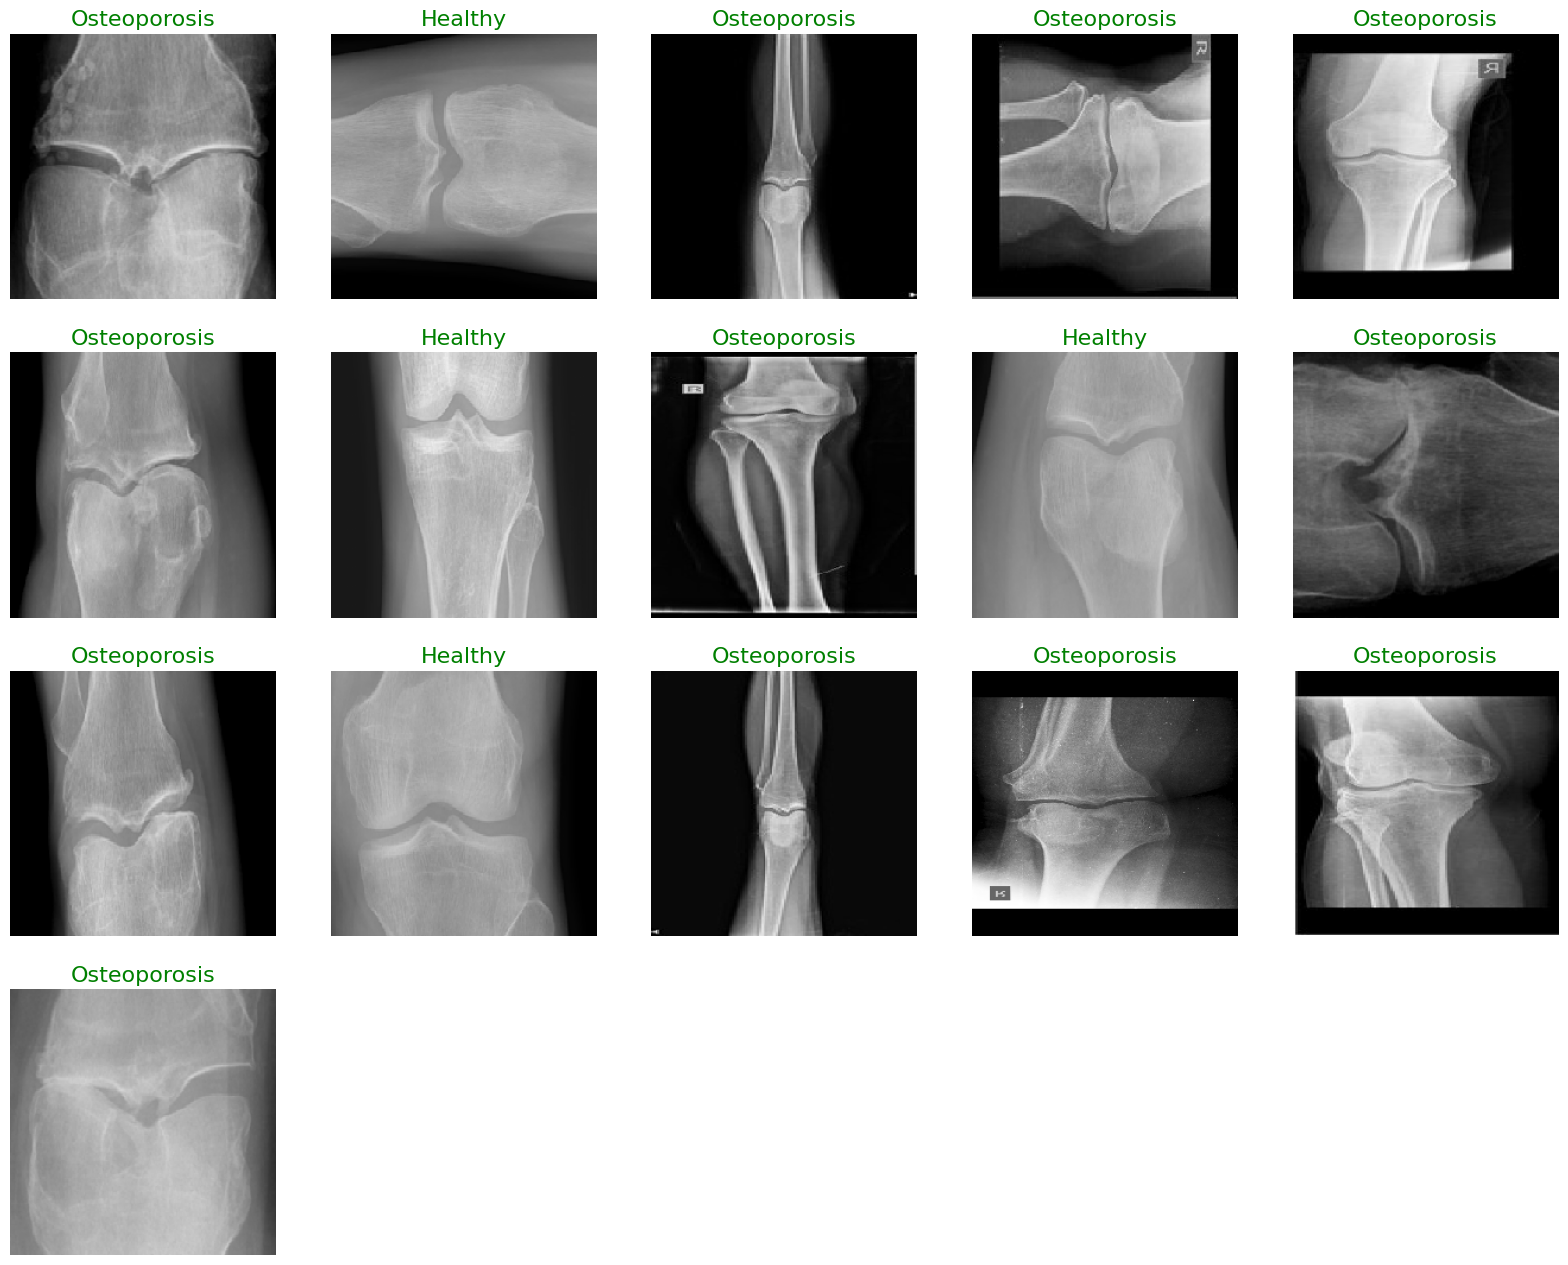

In [18]:
show_knee_images(train)

In [19]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_resnet_model(num_classes=3):
    # Load the pre-trained ResNet152 model without the classification head
    base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the layers in the base model
    for layer in base_model.layers:
        layer.trainable = False

    # Build the classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)  # Add additional dense layer if needed
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the ResNet152-based model
res_model = create_resnet_model()

# Display model summary
res_model.summary()


234698864/234698864 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 58,633,603 (223.67 MB)

 Trainable params: 262,659 (1.00 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [20]:
history_res = res_model.fit(train, validation_data=val, epochs=20, verbose=1)

Epoch 1/20


I0000 00:00:1741153732.432490      94 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1741153732.536038      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


525/681 ━━━━━━━━━━━━━━━━━━━━ 28s 181ms/step - accuracy: 0.6633 - loss: 0.6934

W0000 00:00:1741153827.295504      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


681/681 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.6753 - loss: 0.6773

W0000 00:00:1741153861.075281      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


681/681 ━━━━━━━━━━━━━━━━━━━━ 193s 237ms/step - accuracy: 0.6754 - loss: 0.6772 - val_accuracy: 0.5913 - val_loss: 0.6802
Epoch 2/20


W0000 00:00:1741153893.723367      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


681/681 ━━━━━━━━━━━━━━━━━━━━ 128s 186ms/step - accuracy: 0.7547 - loss: 0.5530 - val_accuracy: 0.7734 - val_loss: 0.5093
Epoch 3/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 127s 185ms/step - accuracy: 0.7990 - loss: 0.4869 - val_accuracy: 0.7940 - val_loss: 0.4790
Epoch 4/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 132s 193ms/step - accuracy: 0.8075 - loss: 0.4664 - val_accuracy: 0.8274 - val_loss: 0.4351
Epoch 5/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 129s 188ms/step - accuracy: 0.8195 - loss: 0.4484 - val_accuracy: 0.8402 - val_loss: 0.4275
Epoch 6/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 133s 194ms/step - accuracy: 0.8287 - loss: 0.4224 - val_accuracy: 0.8241 - val_loss: 0.4843
Epoch 7/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.8210 - loss: 0.4393 - val_accuracy: 0.8035 - val_loss: 0.4442
Epoch 8/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 130s 189ms/step - accuracy: 0.8257 - loss: 0.4209 - val_accuracy: 0.8439 - val_loss: 0.4221
Epoch 9/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 128s 186ms/step - accuracy: 0.8142 - loss: 0.43

In [21]:
history_res1 = res_model.fit(train, validation_data=val, epochs=20, verbose=1)

Epoch 1/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 132s 193ms/step - accuracy: 0.8529 - loss: 0.3597 - val_accuracy: 0.8582 - val_loss: 0.3761
Epoch 2/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 127s 185ms/step - accuracy: 0.8489 - loss: 0.3597 - val_accuracy: 0.8527 - val_loss: 0.3951
Epoch 3/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.8650 - loss: 0.3347 - val_accuracy: 0.8491 - val_loss: 0.3611
Epoch 4/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 129s 187ms/step - accuracy: 0.8582 - loss: 0.3493 - val_accuracy: 0.8601 - val_loss: 0.3746
Epoch 5/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 133s 193ms/step - accuracy: 0.8605 - loss: 0.3458 - val_accuracy: 0.8564 - val_loss: 0.3711
Epoch 6/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 131s 191ms/step - accuracy: 0.8662 - loss: 0.3316 - val_accuracy: 0.8619 - val_loss: 0.3763
Epoch 7/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 127s 186ms/step - accuracy: 0.8701 - loss: 0.3275 - val_accuracy: 0.8623 - val_loss: 0.3718
Epoch 8/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 129s 187ms/step - accuracy: 0.8690 -

In [22]:
history_res2 = res_model.fit(train, validation_data=val, epochs=20, verbose=1)

Epoch 1/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.8815 - loss: 0.2939 - val_accuracy: 0.8722 - val_loss: 0.3452
Epoch 2/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 128s 185ms/step - accuracy: 0.8764 - loss: 0.3107 - val_accuracy: 0.8792 - val_loss: 0.3323
Epoch 3/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 129s 187ms/step - accuracy: 0.8919 - loss: 0.2730 - val_accuracy: 0.8612 - val_loss: 0.3682
Epoch 4/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 131s 190ms/step - accuracy: 0.8852 - loss: 0.2834 - val_accuracy: 0.8167 - val_loss: 0.4386
Epoch 5/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 128s 187ms/step - accuracy: 0.8914 - loss: 0.2754 - val_accuracy: 0.8615 - val_loss: 0.3509
Epoch 6/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 130s 189ms/step - accuracy: 0.8881 - loss: 0.2815 - val_accuracy: 0.8821 - val_loss: 0.3255
Epoch 7/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 132s 192ms/step - accuracy: 0.8869 - loss: 0.2844 - val_accuracy: 0.8799 - val_loss: 0.3444
Epoch 8/20
681/681 ━━━━━━━━━━━━━━━━━━━━ 128s 185ms/step - accuracy: 0.8869 -

In [23]:
history_res3 = res_model.fit(train, validation_data=val, epochs=5, verbose=1)

Epoch 1/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 127s 185ms/step - accuracy: 0.8982 - loss: 0.2526 - val_accuracy: 0.8762 - val_loss: 0.3263
Epoch 2/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 128s 186ms/step - accuracy: 0.8934 - loss: 0.2589 - val_accuracy: 0.8777 - val_loss: 0.3553
Epoch 3/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 132s 193ms/step - accuracy: 0.8966 - loss: 0.2542 - val_accuracy: 0.8810 - val_loss: 0.3227
Epoch 4/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 127s 185ms/step - accuracy: 0.9023 - loss: 0.2414 - val_accuracy: 0.8806 - val_loss: 0.3253
Epoch 5/5
681/681 ━━━━━━━━━━━━━━━━━━━━ 125s 182ms/step - accuracy: 0.8976 - loss: 0.2624 - val_accuracy: 0.8417 - val_loss: 0.4096


In [24]:
# Evaluate the model on the test set
test_loss, test_acc = res_model.evaluate(test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.8572827577590942


W0000 00:00:1741163429.947128      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [25]:
pred = res_model.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

  2/256 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step 

W0000 00:00:1741163448.801240      93 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


256/256 ━━━━━━━━━━━━━━━━━━━━ 57s 185ms/step


W0000 00:00:1741163495.908127      94 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = test_images.labels # set y_test to the expected output
print(classification_report(y_test, pred2))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_test, pred2)*100))

              precision    recall  f1-score   support

     Healthy       0.97      0.78      0.87      2176
  Osteopenia       0.78      0.57      0.66       109
Osteoporosis       0.77      0.97      0.86      1800

    accuracy                           0.86      4085
   macro avg       0.84      0.77      0.79      4085
weighted avg       0.88      0.86      0.86      4085

Accuracy of the Model: 85.7%


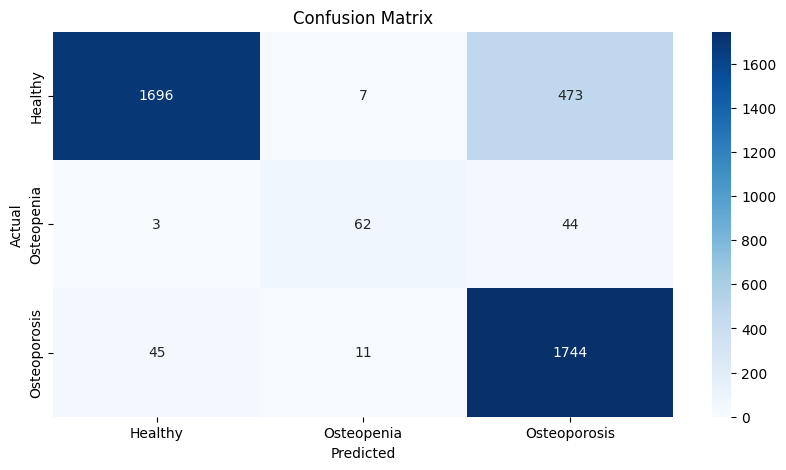

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the class labels
class_labels = ['Healthy', 'Osteopenia','Osteoporosis']

# Calculate the confusion matrix
cm = confusion_matrix(y_test, pred2)

# Create a figure and plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')

# Set tick labels and axis labels
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [28]:
import matplotlib.pyplot as plt

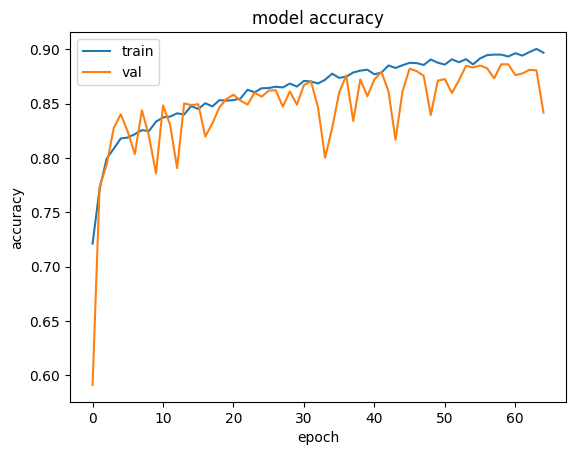

In [31]:
plt.plot(history_res.history["accuracy"] +
history_res1.history["accuracy"] +
history_res2.history["accuracy"] +
history_res3.history["accuracy"] 
)



plt.plot(history_res.history["val_accuracy"] +
history_res1.history["val_accuracy"] +
history_res2.history["val_accuracy"] +
history_res3.history["val_accuracy"] )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

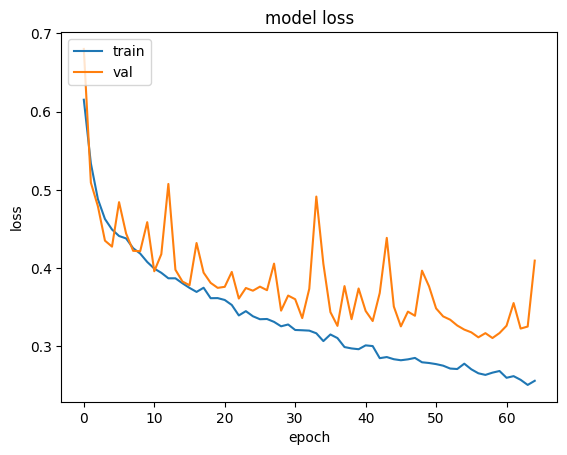

In [32]:
plt.plot(history_res.history["loss"] +
history_res1.history["loss"] +
history_res2.history["loss"] +
history_res3.history["loss"]  )


plt.plot(history_res.history["val_loss"] +
history_res1.history["val_loss"] +
history_res2.history["val_loss"] +
history_res3.history["val_loss"] )


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()